In [1]:
import ants

In [2]:
import os
import numpy as np
import pandas as pd
import nibabel as nib

from nilearn import plotting

/Users/Work/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# High-Grade Gliomas (HGG)
- Gliomas are tumors.
- HGG are tumors that grow at a high rate.

In [3]:
# HGG Train
# Creating folder path for each folder in directory
folder_contents_path = [('data/MICCAI_BraTS_2019_Data_Training/HGG/' + str(file_name)) for file_name in os.listdir('data/MICCAI_BraTS_2019_Data_Training/HGG') if 'BraTS19' in file_name]

In [4]:
# Getting all image data from HGG Training
hgg_img_data_train = []

for folder_path in folder_contents_path:
    for file in os.listdir(folder_path):
        file_path = folder_path + '/' + str(file)
        
        if '.nii.gz' in file_path:
            img = nib.load(file_path)
            array_flat = img.get_data().ravel()
            hgg_img_data_train.append(array_flat)
#             hgg_img_data_train.append(img.get_data().ravel())

In [15]:
# To see what my list looks like, delete when complete
    
hgg_img_data_train

[array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dt

# Low-Grade Gliomas (LGG)
- Gliomas are tumors.
- LGG are tumors that grow at a slow rate.

In [10]:
# LGG Train
# Creating folder path for each folder in directory
folder_contents_path2 = [('data/MICCAI_BraTS_2019_Data_Training/LGG/' + str(file_name)) for file_name in os.listdir('data/MICCAI_BraTS_2019_Data_Training/LGG') if 'BraTS19' in file_name]


# Getting all image data from LGG Training
lgg_img_data_train = []

for folder_path in folder_contents_path2:
    for file in os.listdir(folder_path):
        file_path = folder_path + '/' + str(file)
        
        if '.nii.gz' in file_path:
            img = nib.load(file_path)
            lgg_img_data_train.append(img.get_data().ravel())

In [11]:
# To see what my list looks like, delete when complete
lgg_img_data_train

[array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dt

In [12]:
# Length of each list

print(f' Length of HGG Train List: {len(hgg_img_data_train)}')
print(f' Length of LGG Train List: {len(lgg_img_data_train)}')

 Length of HGG Train List: 1295
 Length of LGG Train List: 380


# Preprocessing: Bias Field Correction
- inconsistent intensities across scans due to scanner error
- will correct these scanner errors using Bias Fiel Correction

In [3]:
img_raw = ants.image_read('data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_flair.nii.gz')

In [4]:
img_raw

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 155)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, -239.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

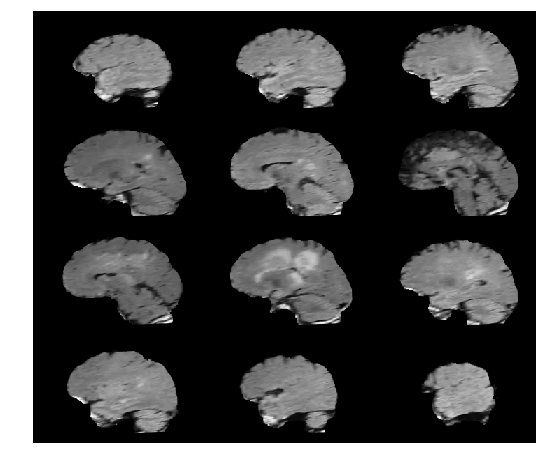

In [5]:
ants.plot(img_raw)

In [8]:
img_n4 = ants.n4_bias_field_correction(img_raw)

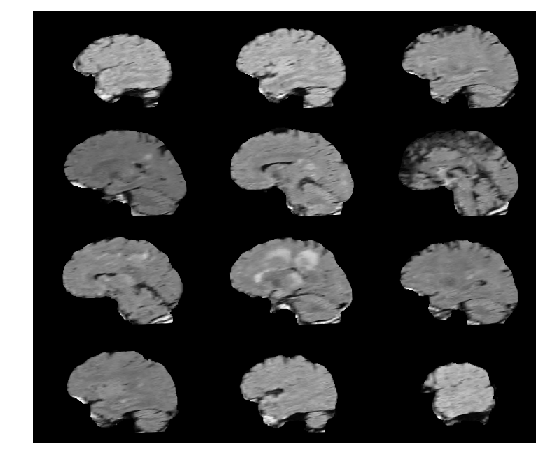

In [9]:
ants.plot(img_n4)

# Playground

In [13]:
img = nib.load('data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_2_1/BraTS19_2013_2_1_flair.nii.gz')

/Users/Work/anaconda3/lib/python3.7/site-packages/scipy/ndimage/measurements.py:305: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


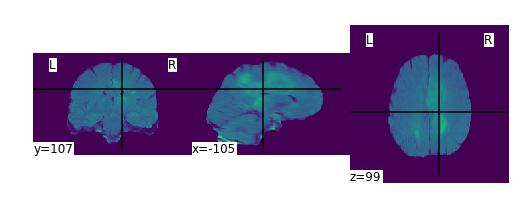

In [14]:
plotting.plot_img(img)

In [10]:
img_n4.numpy().ravel().tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [30]:
img.get_data().ravel().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [45]:
pd.DataFrame(img.get_data().ravel()).T

,0,1,2,3,4,5,6,7,8,9,...,8927990,8927991,8927992,8927993,8927994,8927995,8927996,8927997,8927998,8927999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
